In [1]:
# Importing necessary libraries

import numpy as np  # NumPy for numerical operations
from scipy.integrate import odeint  # SciPy for solving ordinary differential equations
import matplotlib.pyplot as plt  # Matplotlib for plotting
from mpl_toolkits.mplot3d import Axes3D  # 3D plotting tools

# Ignoring warnings to enhance code readability
import warnings
warnings.filterwarnings('ignore')


#### Design a class for the longitudinal model of an aircraft 

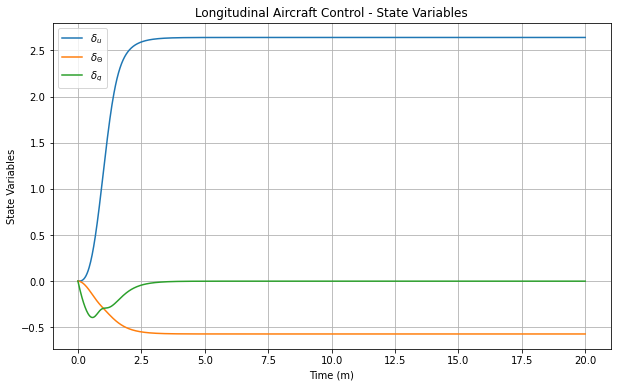

In [2]:
# Define a class for the longitudinal model of an aircraft

class LongitudinalModel:
    def __init__(self):
        
        # Constants and trim values
        self.alpha_0 = 0.0
        self.g = 9.81
        self.m = 5000.0
        self.I_yy = 1000.0
        self.bar_c = 5.0  # mean aerodynamic chord

        # Aerodynamic coefficients
        self.C_D0 = 0.02
        self.C_D_alpha = 0.2
        self.C_D_q = 0.01
        self.C_L0 = 0.1
        self.C_L_alpha = 0.1
        self.C_L_q = 0.02
        self.C_M0 = 0.05
        self.C_M_alpha = -0.1
        self.C_M_q = -0.02
        self.C_Q_delta_e = 0.02
        
        # Functions to calculate aerodynamic forces and moments

    def aerodynamic_drag(self, alpha, delta_alpha, delta_q, delta_u):
        q = 0.5 * self.m * (delta_u ** 2)
        return q * (self.C_D0 + self.C_D_alpha * (alpha + delta_alpha)
                    + self.C_D_q * self.bar_c * delta_q + 0.5 * 1.225 * delta_u)

    def aerodynamic_lift(self, alpha, delta_alpha, delta_q, delta_u):
        q = 0.5 * self.m * ((delta_u + 1.0) ** 2)
        return q * (self.C_L0 + self.C_L_alpha * (alpha + delta_alpha)
                    + self.C_L_q * self.bar_c * delta_q + self.C_L_alpha * delta_u)

    def aerodynamic_pitching_moment(self, alpha, delta_alpha, delta_q, delta_u):
        q = 0.5 * self.m * ((delta_u + 1.0) ** 2)
        return q * self.bar_c * (self.C_M0 + self.C_M_alpha * (alpha + delta_alpha)
                                  + self.C_M_q * self.bar_c * delta_q)

    
    # Elevator effectiveness and thrust force functions
    
    def elevator_effectiveness(self, delta_elevator):
        return self.C_Q_delta_e * delta_elevator

    def thrust_force(self, delta_elevator):
        throttle = 1.0
        T_max = 5000.0
        return T_max * throttle * delta_elevator
    
    # Linearized longitudinal model equations
    
    def linearized_longitudinal_model(self, state, t, delta_elevator):
        delta_u, delta_theta, delta_q, delta_alpha = state

        # Linearized longitudinal model equations
        du_dot = (-self.aerodynamic_drag(self.alpha_0, delta_alpha, delta_q, delta_u)
                  - self.m * self.g * np.sin(self.alpha_0 + delta_alpha) + self.thrust_force(delta_elevator)) / self.m
        dtheta_dot = delta_q
        dq_dot = (-self.aerodynamic_lift(self.alpha_0, delta_alpha, delta_q, delta_u) * self.bar_c
                  - self.aerodynamic_pitching_moment(self.alpha_0, delta_alpha, delta_q, delta_u) * self.bar_c * delta_theta
                  + self.elevator_effectiveness(delta_elevator)) / self.I_yy
        dalpha_dot = delta_q

        return [du_dot, dtheta_dot, dq_dot, dalpha_dot]

# Create an instance of the LongitudinalModel class

model = LongitudinalModel()

# Initial condition

initial_state_longitudinal = [0.0, 0.0, 0., 0.0]

##############################################
# Change initial conditions for the simulation
#state_longitudinal = [1.0, 0.5, 0.2, 8.0]
##############################################

# Time point for simulation
time_points_longitudinal = np.linspace(0, 20, 1000)

# Simulate the longitudinal dynamics using odeint

result_longitudinal = odeint(model.linearized_longitudinal_model, initial_state_longitudinal, time_points_longitudinal, args=(0.0,))

# Extracting result
delta_u_result, delta_theta_result, delta_q_result, delta_alpha_result = result_longitudinal.T

# Plotting results
plt.figure(figsize=(10, 6))
plt.plot(time_points_longitudinal, delta_u_result, label='$\delta_u$')
plt.plot(time_points_longitudinal, delta_theta_result, label='$\delta_\Theta$')
plt.plot(time_points_longitudinal, delta_q_result, label='$\delta_q$')
# Uncomment the line below to plot delta_alpha_result if needed 
# plt.plot(time_points_longitudinal, delta_alpha_result, label='$\delta_a$')
plt.xlabel('Time (m)')
plt.ylabel('State Variables')
plt.legend()
plt.title('Longitudinal Aircraft Control - State Variables')
plt.grid(True)
plt.show()


The state variable $\delta_\Theta$ (pitch angle) and $\delta_\alpha$ (angle of attack) have the same behavior(curve).

#### Study of the controllability of the system, by varying certain variables.

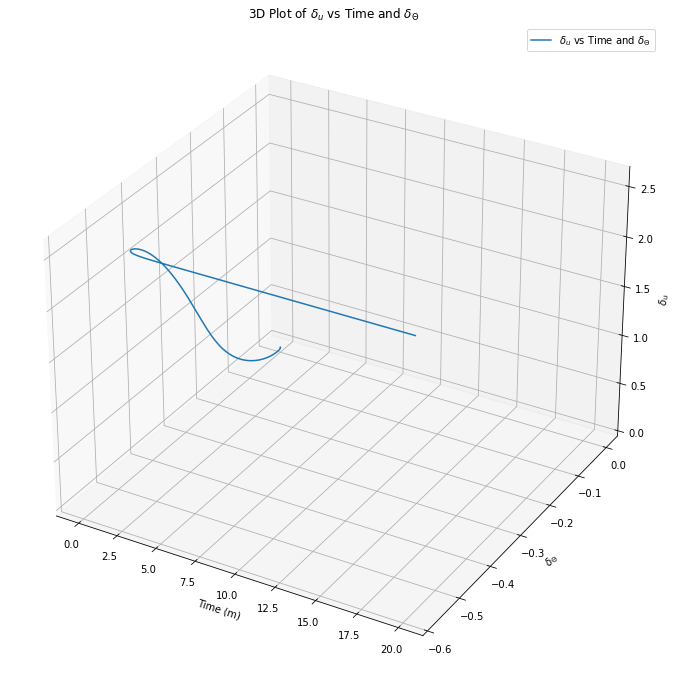

In [3]:
# Variations for 'forward velocity'  according to 'time' and 'pitch angle'

fig = plt.figure(figsize=(15, 12))
ax = fig.add_subplot(111, projection='3d')

# Plot 'forward velocity' as a function of 'time' and 'pitch angle'
ax.plot(time_points_longitudinal, delta_theta_result, delta_u_result, label='$\delta_u$ vs Time and $\delta_\Theta$')

ax.set_xlabel('Time (m)')
ax.set_ylabel('$\delta_\Theta$')
ax.set_zlabel('$\delta_u$')
ax.legend()
ax.set_title('3D Plot of $\delta_u$ vs Time and $\delta_\Theta$')

plt.show()

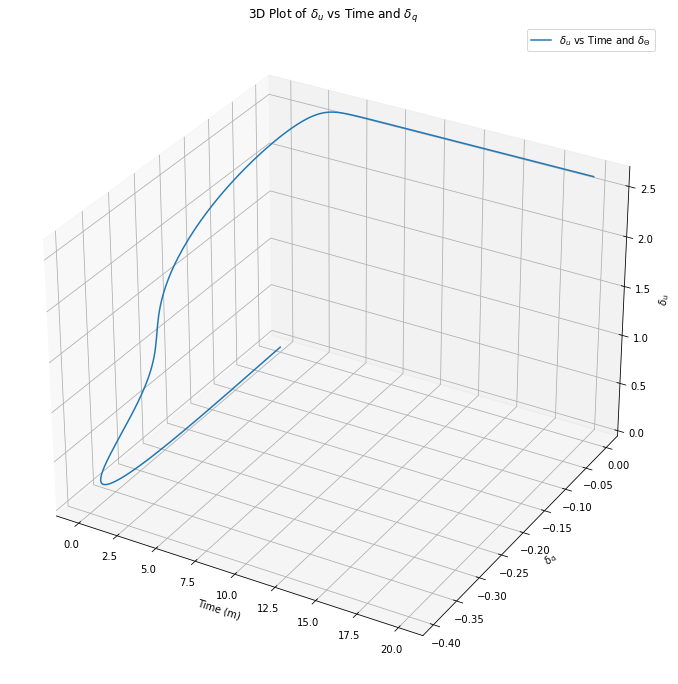

In [4]:
# Variations for 'forward velocity'  according to 'time' and 'pitch rate'

# Plotting results in 3D
fig = plt.figure(figsize=(15, 12))
ax = fig.add_subplot(111, projection='3d')

# Plot 'forward velocity' as a function of 'time' and 'pitch rate'
ax.plot(time_points_longitudinal, delta_q_result, delta_u_result, label='$\delta_u$ vs Time and $\delta_\Theta$')

ax.set_xlabel('Time (m)')
ax.set_ylabel('$\delta_q$')
ax.set_zlabel('$\delta_u$')
ax.legend()
ax.set_title('3D Plot of $\delta_u$ vs Time and $\delta_q$')

plt.show()

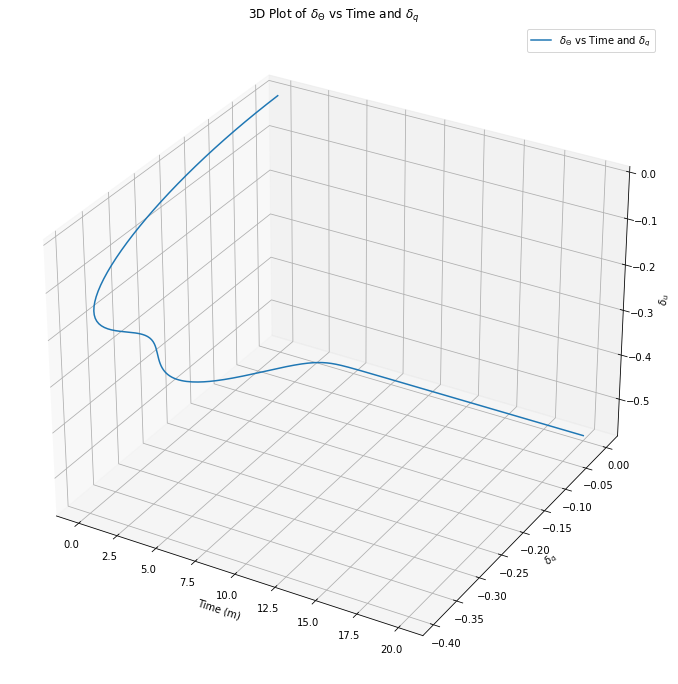

In [5]:
# Variations for 'pitch angle'  according to 'time' and 'pitch rate'

# Plotting results in 3D
fig = plt.figure(figsize=(15, 12))
ax = fig.add_subplot(111, projection='3d')

# Plot 'pitch angle' as a function of 'time' and 'pitch rate'
ax.plot(time_points_longitudinal, delta_q_result, delta_theta_result ,label='$\delta_\Theta$ vs Time and $\delta_q$')

ax.set_xlabel('Time (m)')
ax.set_ylabel('$\delta_q$')
ax.set_zlabel('$\delta_u$')
ax.legend()
ax.set_title('3D Plot of $\delta_\Theta$ vs Time and $\delta_q$')

plt.show()

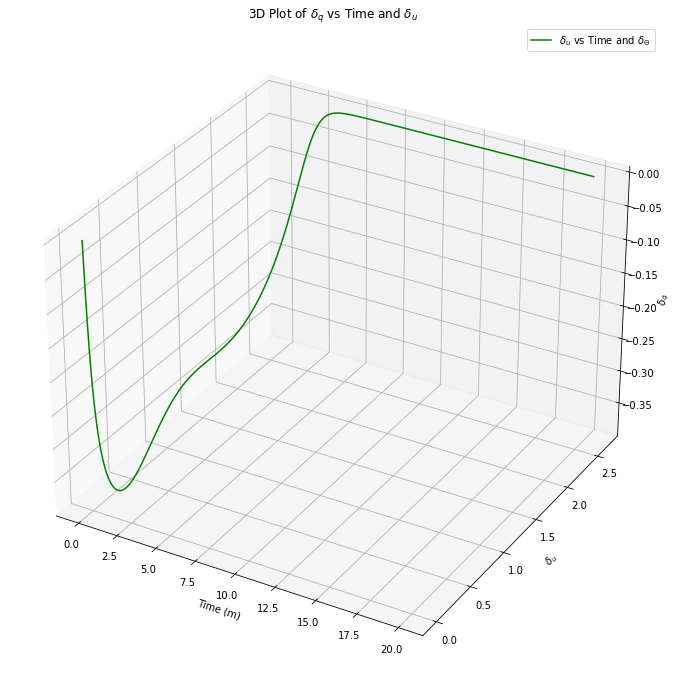

In [6]:
# Variations for 'pitch rate'  according to 'time' and 'forward velocity'

# Plotting results in 3D
fig = plt.figure(figsize=(15, 12))
ax = fig.add_subplot(111, projection='3d')

# Plot 'pitch rate' as a function of 'time' and 'forward velocity'
ax.plot(time_points_longitudinal, delta_u_result,  delta_q_result, 'g',label='$\delta_u$ vs Time and $\delta_\Theta$')

ax.set_xlabel('Time (m)')
ax.set_ylabel('$\delta_u$')
ax.set_zlabel('$\delta_q$')
ax.legend()
ax.set_title('3D Plot of $\delta_q$ vs Time and $\delta_u$')

plt.show()

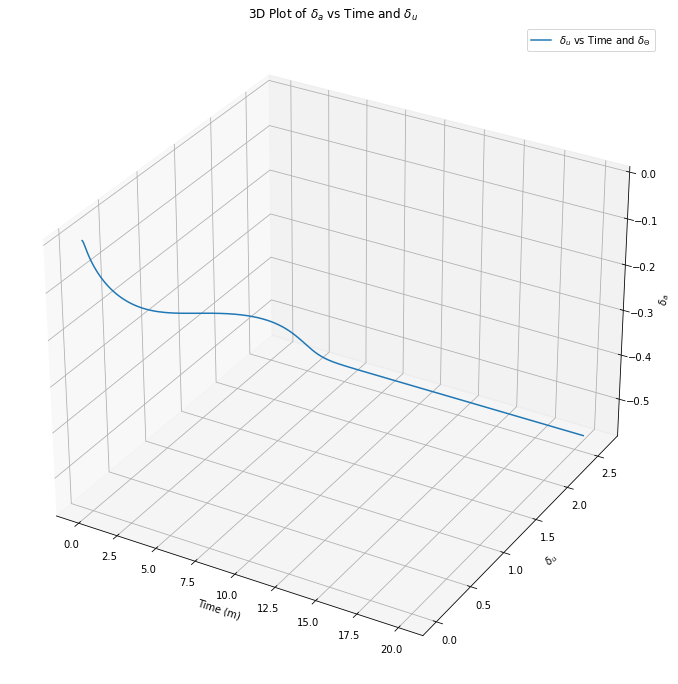

In [7]:
# Variations for angle of attack' according to 'time' and 'forward velocity'

# Plotting results in 3D
fig = plt.figure(figsize=(15, 12))
ax = fig.add_subplot(111, projection='3d')

# Plot 'angle of attack' as a function of 'time' and 'forward velocity'
ax.plot(time_points_longitudinal, delta_u_result,  delta_alpha_result, label='$\delta_u$ vs Time and $\delta_\Theta$')

ax.set_xlabel('Time (m)')
ax.set_ylabel('$\delta_u$')
ax.set_zlabel('$\delta_a$')
ax.legend()
ax.set_title('3D Plot of $\delta_a$ vs Time and $\delta_u$')

plt.show()

##### Study of the system with some fault in the lift coefficient

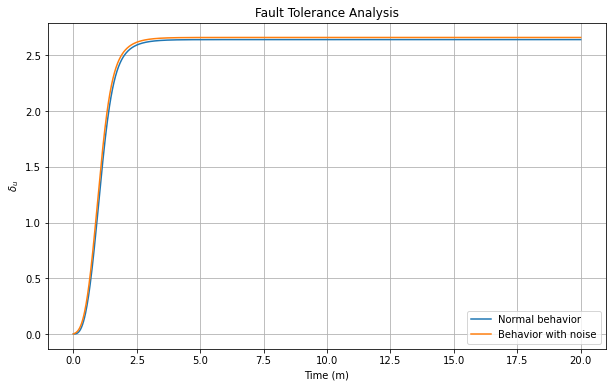

In [8]:
# Function to introduce a fault and run a simulation

# Function to run a single simulation
def run_simulation(model, initial_state, time_points, delta_elevator=0.0):
    result = odeint(model.linearized_longitudinal_model, initial_state, time_points, args=(delta_elevator,))
    return result.T

def introduce_fault(model, initial_state, time_points, fault_magnitude=0.1, fault_location='elevator'):
    if fault_location == 'elevator':
        delta_elevator = fault_magnitude
    elif fault_location == 'lift_coefficient':
        model.C_L_alpha *= (1 - fault_magnitude)  # Introduce fault in lift coefficient
        delta_elevator = 0.0  # Assume no fault in elevator for this case

    result = odeint(model.linearized_longitudinal_model, initial_state, time_points, args=(delta_elevator,))
    return result.T

# Function to assess fault tolerance
def evaluate_fault_tolerance(model, initial_state, time_points, fault_magnitude=0.1, fault_location='elevator'):
    normal_response = run_simulation(model, initial_state, time_points)

    # Introduce a fault
    faulty_response = introduce_fault(model, initial_state, time_points, fault_magnitude, fault_location)

    # Plot the normal and faulty responses for comparison
    plt.figure(figsize=(10, 6))
    plt.plot(time_points, normal_response[0], label='Normal behavior')
    plt.plot(time_points, faulty_response[0], label='Behavior with noise')
    plt.xlabel('Time (m)')
    plt.ylabel('$\delta_u$')
    plt.legend()
    plt.title('Fault Tolerance Analysis')
    plt.grid(True)
    plt.savefig("fault.png", dpi=300)
    plt.show()

# Simulation parameters
initial_state_longitudinal = [0.0, 0.0, 0.0, 0.0]
time_points_longitudinal = np.linspace(0, 20, 1000)

# Initialize the longitudinal model
model = LongitudinalModel()

# Evaluate fault tolerance with a fault in elevator (change the location or magnitude as needed)
evaluate_fault_tolerance(model, initial_state_longitudinal, time_points_longitudinal, fault_location='elevator')


#### Study  of aviability of the system when there is exceedance of certain parameters

In [9]:
threshold = 0.1


# Function to calculate availability
def calculate_availability(model, initial_state, time_points, num_simulations=100, delta_elevator=0.0):
    num_failures = 0

    for _ in range(num_simulations):
        result = run_simulation(model, initial_state, time_points, delta_elevator)
        # Add logic to check for failure conditions (e.g., exceedance of certain parameters)
        if condition_met(result):
            num_failures += 1

    availability = 1 -(num_failures / num_simulations)
    return availability

# Simulation parameters
initial_state_longitudinal = [10.0, 20.0, 50.0, 1000.0]
time_points_longitudinal = np.linspace(0, 20, 1000)

# Initialize the longitudinal model
model = LongitudinalModel()

# Run a single simulation for demonstration purposes
baseline_result = run_simulation(model, initial_state_longitudinal, time_points_longitudinal)

# Function to check for failure conditions (customize based on your model)
def condition_met(result):
    # Example: Check if any state variable exceeds a certain threshold
    #print(result)
    return np.all(np.abs(result) > threshold)

# Example: Calculate availability
availability = calculate_availability(model, initial_state_longitudinal, time_points_longitudinal)

print(f"System Availability: {availability * 100:.1f}%")

System Availability: 100.0%


#### Study of redundancy of the system

In [10]:
# Function to introduce redundancy and run simulations

def introduce_redundancy(model, initial_state, time_points, num_simulations=100, delta_elevator=0.0, redundancy_factor=2):
    num_failures = 0

    for _ in range(num_simulations):
        # Run the simulation with redundancy
        combined_result = np.zeros_like(run_simulation(model, initial_state, time_points, delta_elevator))
        for _ in range(redundancy_factor):
            result = run_simulation(model, initial_state, time_points, delta_elevator)
            combined_result += result

        # Check for failure conditions
        if np.any(condition_met(combined_result / redundancy_factor)):
            num_failures += 1

    redundancy_ratio = 1 - (num_failures / num_simulations)
    return redundancy_ratio

# Simulation parameters
initial_state_longitudinal = [0.0, 0.0, 0.0, 0.0]
time_points_longitudinal = np.linspace(0, 20, 1000)

# Initialize the longitudinal model
model = LongitudinalModel()

# Example: Introduce redundancy and calculate redundancy ratio
redundancy_ratio = introduce_redundancy(model, initial_state_longitudinal, time_points_longitudinal)

print(f"Redundancy Ratio: {redundancy_ratio * 100:.2f}%")

Redundancy Ratio: 100.00%


#### Study of reachability of the system

In [11]:
def test_reachability(A, B, desired_state, initial_state, time_horizon):
    """
    Test if desired_state is reachable from initial_state within time_horizon.
    A and B are system matrices for state and input respectively.
    """
    # Compute the state transition matrix using matrix exponential
    from scipy.linalg import expm
    
    # Discretize the system for simplicity
    delta_t = 0.1 # small time step
    Ad = expm(A * delta_t)
    Bd = B * delta_t

    # Simulate reachability over time_horizon
    current_state = initial_state
    for _ in np.arange(0, time_horizon, delta_t):
        # Check if current_state is close to desired_state
        if np.allclose(current_state, desired_state, atol=1e-4):
            return True
        # Apply control input (here we simply try max input for illustration)
        u = np.ones(B.shape[1])
        current_state = Ad @ current_state + Bd @ u
    
    return False

# Define your system matrices A and B
# A is the airplane at rest
# B is the airplane with d_u = 20m/s, d_theta = 5 degrees, d_q = 0.1 radians, d_a = 2 degrees
A = np.array([[0.,0.,0.,0.], [0., 0.,0, 0], [0, 0, 0, 0], [0, 0, 0, 0]]) # Replace with appropriate values
B = np.array([[20.], [0.0873], [0.1], [0.0349]]) # Replace with appropriate values

# Set initial and desired states
initial_state = np.array([0.,0.,0.,0.])
desired_state = np.array([20, 0.0873, 0.1, 0.0349])

# Set the time horizon for reachability test
time_horizon = 100 # Adjust as needed

# Test reachability
is_reachable = test_reachability(A, B, desired_state, initial_state, time_horizon)
print(f"Desired state is reachable: {is_reachable}")


Desired state is reachable: True
